# $\hspace{115pt} $ Experiment 2

##### Plot and calculate error between $$\int_0^5 \frac{1}{1 + t^2} dt$$ and $$ tan^{-1} (t)$$

##### Using both manual implementation of trapezoidal method of integration and the in-built integration function quad (in scipy.integrate).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd

h = 0.1
x = np.linspace(0.0, 5.0, num=(5.0/h) + 1)
print (x)
print (x[::2])

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5. ]
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5. ]


d:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


The function to calculate $$\frac{1}{1+t^2}$$

In [4]:
def function(t):
    return 1/(1+t*t)

The function to calculate $$\int_a^b \frac{1}{1 + t^2} dt$$ in steps of h using trapezoidal integration method.

In [5]:
def trapezoidalIntegral(h,a,b):
    x = np.linspace(0.0, 5.0, num = (5.0/h + 1))
    y = h*(np.cumsum(function(x)) - 0.5*(function(0) + function(x)))
    return y

Plot the function $1/(1+t^{2})$ vs t

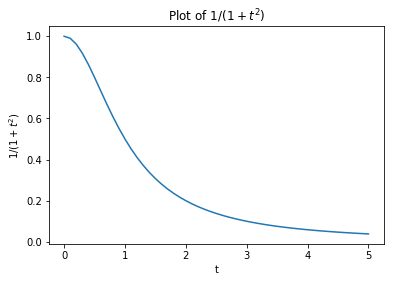

In [6]:
plt.plot(x, function(x))
plt.title('Plot of $1/(1+t^{2})$')
plt.xlabel('t')
plt.ylabel('$1/(1+t^{2})$')
plt.show()

Tabulate the values of $tan^{-1} x$ vs $\int_a^b \frac{1}{1 + t^2} dt$ calculated using in-built quad function. 

In [7]:
y = []
for i in x:
    y.append(quad(function, 0, i)[0])
df = pd.DataFrame()
df['tan^(-1) x'] = np.arctan(x)  
df['Integral of function(x)'] = y
print (df)

    tan^(-1) x  Integral of function(x)
0     0.000000                 0.000000
1     0.099669                 0.099669
2     0.197396                 0.197396
3     0.291457                 0.291457
4     0.380506                 0.380506
5     0.463648                 0.463648
6     0.540420                 0.540420
7     0.610726                 0.610726
8     0.674741                 0.674741
9     0.732815                 0.732815
10    0.785398                 0.785398
11    0.832981                 0.832981
12    0.876058                 0.876058
13    0.915101                 0.915101
14    0.950547                 0.950547
15    0.982794                 0.982794
16    1.012197                 1.012197
17    1.039072                 1.039072
18    1.063698                 1.063698
19    1.086318                 1.086318
20    1.107149                 1.107149
21    1.126377                 1.126377
22    1.144169                 1.144169
23    1.160669                 1.160669


Plot the above tabulated values against x

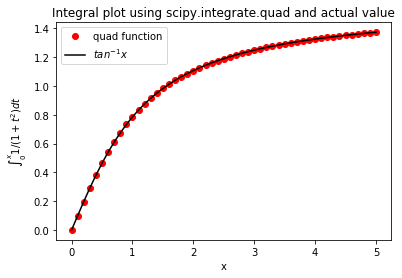

In [8]:
plt.plot(x, y, 'ro') 					#Plot the result of the integral
plt.plot(x, np.arctan(x), '#000000') 	#Plot the actual value of tan^(-1) x
plt.legend(('quad function','$tan^{-1} x$')) 
plt.title('Integral plot using scipy.integrate.quad and actual value')
plt.xlabel('x')
plt.ylabel('$\int_0^x 1/(1+t^2) dt$')
plt.show()

Plot the error between the above obtained values and the actual values of $tan^{-1} x$

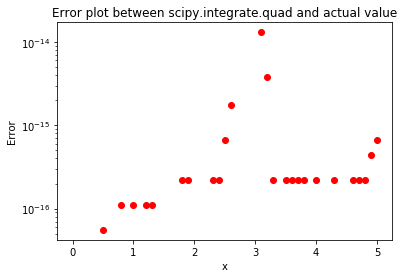

In [9]:
plt.semilogy(x, abs(y - np.arctan(x)), 'ro')
plt.title('Error plot between scipy.integrate.quad and actual value')
plt.xlabel('x')
plt.ylabel('Error')
plt.show()

Calculate the trapezoidal integral of the function

d:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


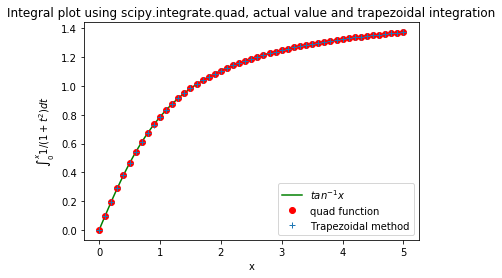

In [10]:
trapezoid = trapezoidalIntegral(0.1,0,5)
plt.title('Integral plot using scipy.integrate.quad, actual value and trapezoidal integration')
plt.xlabel('x')
plt.ylabel('$\int_0^x 1/(1+t^2) dt$')
plt.plot(x, np.arctan(x), 'g')
plt.plot(x, y, 'ro')
plt.plot(x, trapezoid, '+')
plt.legend(('$tan^{-1} x$', 'quad function', 'Trapezoidal method')) 
plt.show()

Calculate Actual Error ( difference between the values obtained through trapezoidal integration and the actual values of $tan^{-1} x$ ) and the Estimated Error ( the difference between common values of function in 2 successive iterations of the step variable h )

In [12]:
estError = []
actError = []
h = 0.1
hList = []
maxError = 1
while maxError > 10**-8:  
    trapezoid = trapezoidalIntegral(h,0,5)
    actError.append(max(abs(trapezoid - np.arctan(np.linspace(0, 5, num = (int)(5/h + 1))))))
    hList.append(h)
    h = h/2
    nextTrapezoid = trapezoidalIntegral(h,0,5)
    maxError = max(abs(trapezoid - nextTrapezoid[::2]))
    estError.append(maxError)

d:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


Plot the above obtained Actual and Estimated errors against x

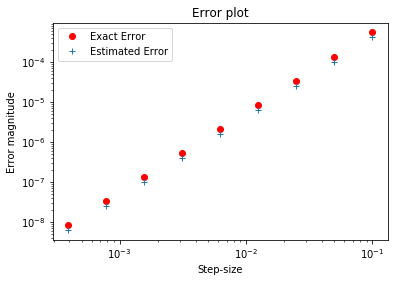

In [10]:
plt.loglog(hList, actError, 'ro')
plt.loglog(hList, estError, '+')
plt.title('Error plot')
plt.xlabel('Step-size')
plt.ylabel('Error magnitude')
plt.legend(('Exact Error','Estimated Error'))
plt.show()